# Data Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Loading the data

In [2]:
data = pd.read_csv("./clean_data.csv")
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,157175,1,1,57,188,57,57,57.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,71454,2,2,56,220,28,28,28.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,142,2,2,102,224,51,51,51.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,80,5546317,4,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,443,171541,7,5,376,3508,201,0,53.714286,78.686539,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Exploratory data analysis

In [3]:
data.shape

(215214, 79)

In [4]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,215214.000000,2.152140e+05,215214.000000,215214.000000,2.152140e+05,2.152140e+05,215214.000000,215214.000000,215214.000000,215214.000000,...,215214.000000,215214.000000,2.152140e+05,2.152140e+05,2.152140e+05,2.152140e+05,2.152140e+05,2.152140e+05,2.152140e+05,2.152140e+05
mean,4516.800375,3.397546e+07,8.539105,8.608947,5.101188e+02,1.505489e+04,233.785209,12.353708,57.924114,85.683381,...,4.981651,27.022889,9.849517e+04,4.642099e+04,1.605392e+05,6.920605e+04,2.886879e+07,5.800799e+05,2.937767e+07,2.842059e+07
std,14172.959948,4.488076e+07,618.933110,790.257042,5.430883e+03,2.009496e+06,538.638745,53.285873,143.893878,203.112735,...,595.605860,6.252970,7.452281e+05,4.856192e+05,1.097199e+06,6.537160e+05,4.184756e+07,5.035568e+06,4.217952e+07,4.185873e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,2.150000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.344155e+05,3.000000,2.000000,9.400000e+01,2.260000e+02,50.000000,0.000000,42.000000,2.449490,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,8.537324e+07,7.000000,6.000000,3.680000e+02,1.159500e+04,349.000000,6.000000,58.833333,135.325410,...,2.000000,32.000000,1.010000e+03,0.000000e+00,1.010000e+03,1.006000e+03,8.410000e+07,0.000000e+00,8.440000e+07,8.410000e+07
max,65487.000000,1.200000e+08,200332.000000,270602.000000,1.185733e+06,6.270000e+08,23360.000000,1983.000000,3150.120000,5201.988543,...,190702.000000,60.000000,1.000000e+08,7.000000e+07,1.000000e+08,1.000000e+08,1.200000e+08,7.480000e+07,1.200000e+08,1.200000e+08


In [5]:
data.dtypes.to_frame()

,0
Destination Port,int64
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
Total Length of Fwd Packets,int64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,int64
Idle Min,int64


<Axes: ylabel='Frequency'>

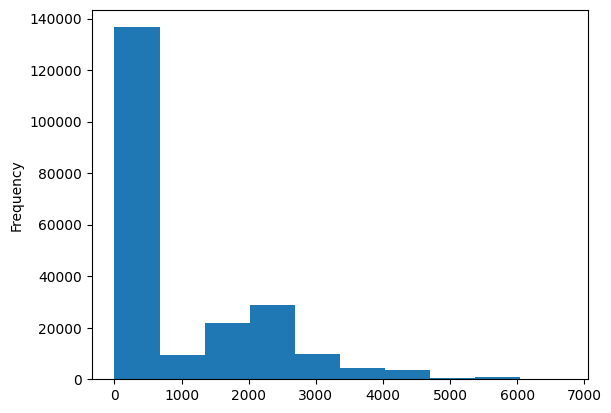

In [19]:
data["Bwd Packet Length Std"].plot(kind = "hist")

### Feature selection

In [7]:
#Create target column and features table
y = data["Label"]
X = data.drop("Label", axis = 1)

#Replace infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(999, inplace=True)

#Scale the features table
std = StandardScaler()
X = std.fit_transform(X)


#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Create random forest model
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

#Take all features labels in list
labels = data.columns.tolist()
labels.remove("Label")

#Sort features according to feature importance for the random forest model
sort = rf.feature_importances_.argsort()
labels_sorted = [labels[i] for i in sort]

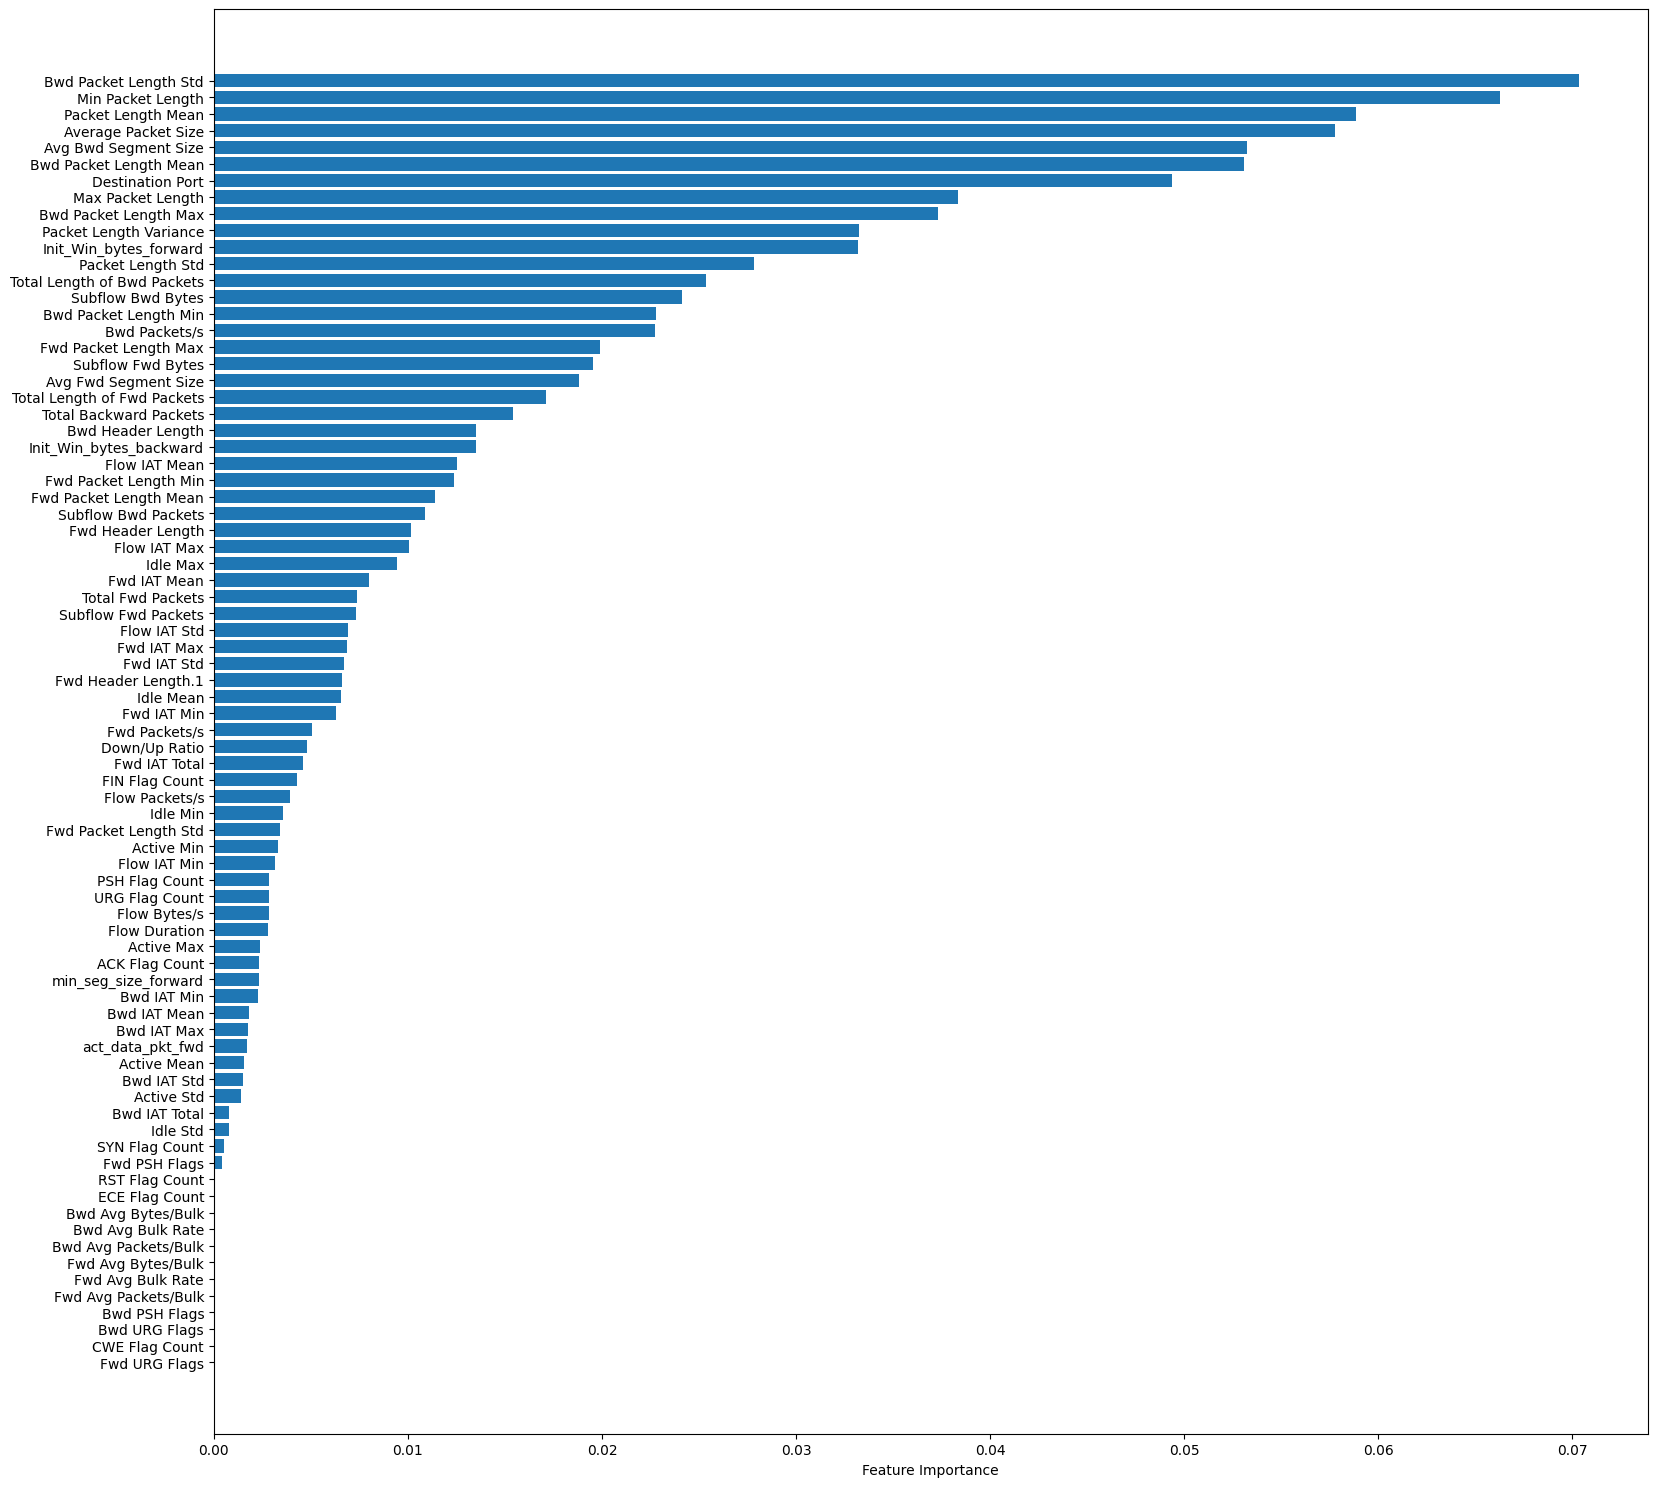

In [8]:
#Make barplot of features and their importance
plt.barh(labels_sorted, rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)

In [9]:
#Make predictions on the test set
y_pred = rf.predict(X_test)

#Evaluate model accuracy
accuracy_score(y_test, y_pred, normalize=False)

53775

In [10]:
len(y_test)

53804

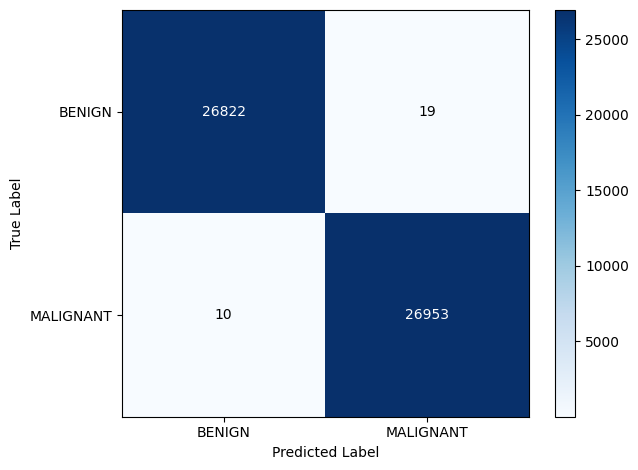

In [11]:
#Function for plotting confusion matrix
def plot_binary_confusion_matrix(y_true, y_pred, title=None, cmap=plt.cm.Blues):
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels = ["BENIGN", "MALIGNANT"])
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Set class labels for binary classification
    classes = ["BENIGN", "MALIGNANT"]
    
    # Set classes as tick labels
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Add labels to axes
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    # Annotate the plot with the confusion matrix values
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    plt.show()

#Plot confusion matrix for the random forest model
plot_binary_confusion_matrix(y_test, y_pred)

In [12]:
#Keep the 40 most impactful features in new list
labels_important = labels_sorted[-40:]

#Check the lengths of features lists
len(labels_sorted), len(labels_important)

(78, 40)

In [13]:
#New features table containing only impactful features
X2 = data[labels_important]

#Replace infinite values
X2.replace([np.inf, -np.inf], np.nan, inplace=True)
X2.fillna(999, inplace=True)

#Scale the new features table
std = StandardScaler()
X2 = std.fit_transform(X2)

#Create new train/test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

#Create new random forest model
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X2_train, y_train)

C:\Users\Admir\AppData\Local\Temp\ipykernel_18212\3854370063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Admir\AppData\Local\Temp\ipykernel_18212\3854370063.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.fillna(999, inplace=True)


RandomForestClassifier(n_estimators=150)

In [14]:
#Make predictions on the test set
y_pred = rf.predict(X2_test)

#Evaluate model accuracy of the new model
accuracy_score(y_test, y_pred, normalize=False)

53775

In [15]:
len(y_test)

53804

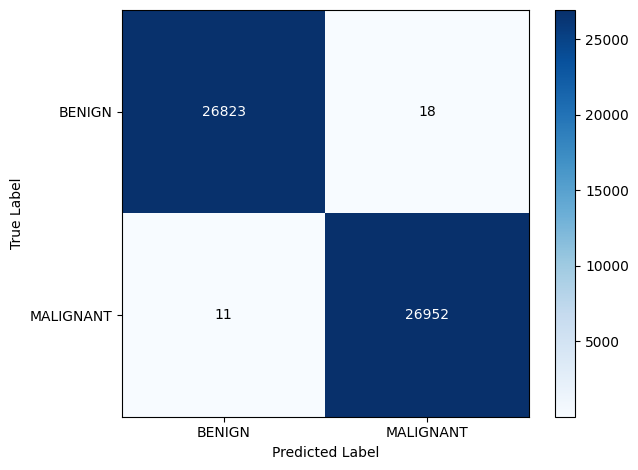

In [16]:
#Plot confusion matrix for the new random forest model
plot_binary_confusion_matrix(y_test, y_pred)

In [26]:
#Create new preprocessed dataframe containing only important features
labels_important.append("Label")
data_important = data[labels_important]
data_important

,Fwd Packets/s,Fwd IAT Min,Idle Mean,Fwd Header Length.1,Fwd IAT Std,Fwd IAT Max,Flow IAT Std,Subflow Fwd Packets,Total Fwd Packets,Fwd IAT Mean,...,Bwd Packet Length Max,Max Packet Length,Destination Port,Bwd Packet Length Mean,Avg Bwd Segment Size,Average Packet Size,Packet Length Mean,Min Packet Length,Bwd Packet Length Std,Label
0,6.362335,0,0.0,32,0.000000e+00,0,0.000000e+00,1,1,0.000000e+00,...,188,188,53,188.000000,188.000000,151.000000,100.666667,57,0.000000,BENIGN
1,27.990036,1,0.0,64,0.000000e+00,1,4.124966e+04,2,2,1.000000e+00,...,110,110,53,110.000000,110.000000,76.000000,60.800000,28,0.000000,BENIGN
2,14084.507040,4,0.0,64,0.000000e+00,4,7.592321e+01,2,2,4.000000e+00,...,112,112,53,112.000000,112.000000,94.250000,75.400000,51,0.000000,BENIGN
3,0.721199,294763,0.0,136,2.084758e+06,4217948,1.788425e+06,4,4,1.848772e+06,...,0,0,80,0.000000,0.000000,0.000000,0.000000,0,0.000000,BENIGN
4,40.806571,1122,0.0,152,1.682422e+04,48851,1.800531e+04,7,7,2.859017e+04,...,1460,1460,443,701.600000,701.600000,323.666667,298.769231,0,731.564625,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215209,0.104812,191,85600000.0,296,3.030000e+07,85600000,2.290000e+07,9,9,1.070000e+07,...,8688,8688,80,1932.500000,1932.500000,799.266667,749.312500,0,3384.303045,MALIGNANT
215210,0.091255,1,98600000.0,296,3.490000e+07,98600000,2.640000e+07,9,9,1.230000e+07,...,5792,5792,80,1932.500000,1932.500000,799.466667,749.500000,0,2181.008184,MALIGNANT
215211,4863.813230,3,0.0,148,5.060007e+02,1016,5.060007e+02,5,5,2.570000e+02,...,0,6,80,0.000000,0.000000,1.200000,1.000000,0,0.000000,MALIGNANT
215212,0.093880,1,85100000.0,240,3.220000e+07,85100000,2.460000e+07,8,8,1.220000e+07,...,8688,8688,80,2319.000000,2319.000000,916.769231,851.285714,0,3633.797050,MALIGNANT


In [28]:
#Saving new dataframe to csv file
data_important.to_csv("preprocessed_data.csv", index = False)